In [151]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, io, transform, color
import copy

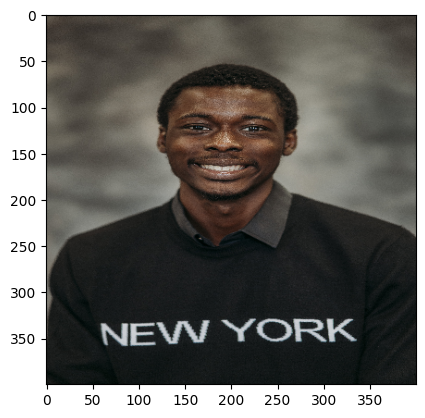

In [152]:
#input my desired picture then resize it into a 400 by 400 pixel image
my_pic = io.imread("data/David_pic.jpg")

def resize_my_img(img, new_hgt, new_wdt):
    """This function helps to manually resize our image by taking the image and the heights
    and widths we want as positional arguments"""
    height, width, _1 = img.shape

    row = height / new_hgt
    col = width / new_wdt

    new_image = np.zeros((new_hgt, new_wdt, _1), dtype=img.dtype)

    for x in range(new_hgt):
        for y in range(new_wdt):
            old_x = int(x * row)
            old_y = int(y * col)

            new_image[x,y] = img[old_x, old_y]
    return new_image

image_resized = resize_my_img(my_pic, 400, 400)

plt.imshow(image_resized)
plt.show()


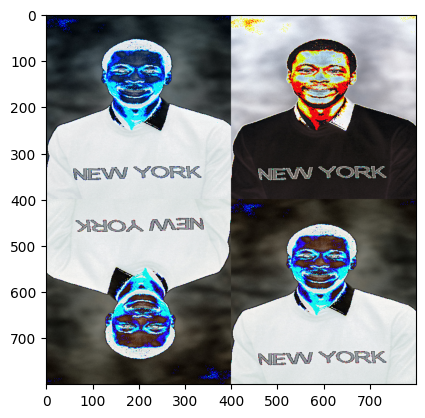

In [153]:
#Warhol images


def lightening (pic):
    """This is used to increase the light pixels of the image"""
    pic[:,:]=pic[:,:]-50
    
    return pic

def flip(pic):
    """This functions flips the image"""
    w = len(pic[0])    
    h = len(pic[:,0]) 

    new_pic = np.array(pic)
    for i in range(h):
        for j in range(w):
            new_pic[h-1-i,w-1-j] = pic[i,j]  # <-- work through the logic here i and j, is the row and the column, goes backwards
            
    return new_pic

def color_change(img):
    """The function changed the picture color"""
    return 1 - img

def sort_image(img):
    """Sort the pixels of the image"""
    sorted_img = np.sort(img)
    return sorted_img



lighten_img = copy.deepcopy(image_resized)
lighten_img = lightening(image_resized)



color_img = copy.deepcopy(image_resized)
color_img = color_change(image_resized)

sort_my_image = copy.deepcopy(image_resized)
sort_my_image = sort_image(image_resized)


flipped_img = copy.deepcopy(image_resized)
flipped_img = flip(flipped_img)



height, width, _1 = image_resized.shape

grid_image = np.zeros((height *2, width * 2, _1), dtype=np.uint8)

#this helps to put the image into a 2x2 grid by doubling heights and widths and arranging the images

grid_image[:height, :width] = sort_my_image
grid_image[:height, width:] = color_img
grid_image[height:, :width] = flipped_img
grid_image[height:, width:] = lighten_img

plt.imshow(grid_image)
plt.show()
##plt.imshow(flipped_img)
#plt.show()